In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns


In [16]:
data = pd.read_csv('lesaoPorEquipe.csv')
display(data)

,season,team,injuries,demoted,place
0,2016,America-MG,43,Yes,20
1,2016,Atletico-MG,56,No,4
2,2016,Atletico Paranaense,68,No,6
3,2016,Botafogo,44,No,5
4,2016,Chapecoense,33,No,11
...,...,...,...,...,...
155,2023,Internacional,45,No,9
156,2023,Palmeiras,26,No,1
157,2023,Santos,41,Yes,17
158,2023,Sao Paulo,55,No,11


In [17]:
data.describe()

,season,injuries,place
count,160.000000,160.000000,160.000000
mean,2019.500000,36.762500,10.500000
std,2.298482,13.148158,5.784386
min,2016.000000,4.000000,1.000000
25%,2017.750000,26.000000,5.750000
50%,2019.500000,37.000000,10.500000
75%,2021.250000,45.000000,15.250000
max,2023.000000,69.000000,20.000000


In [18]:
data['injuries'] = pd.to_numeric(data['injuries'], errors='coerce')

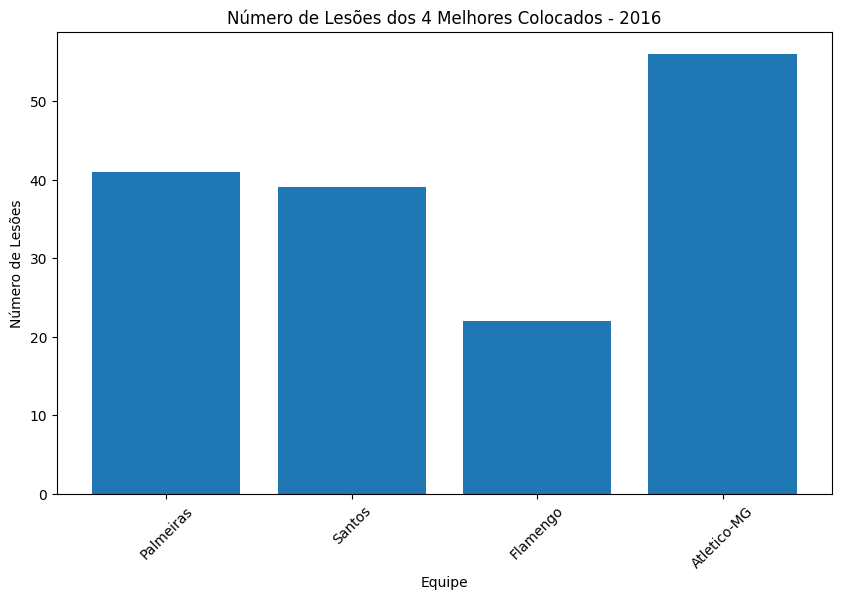

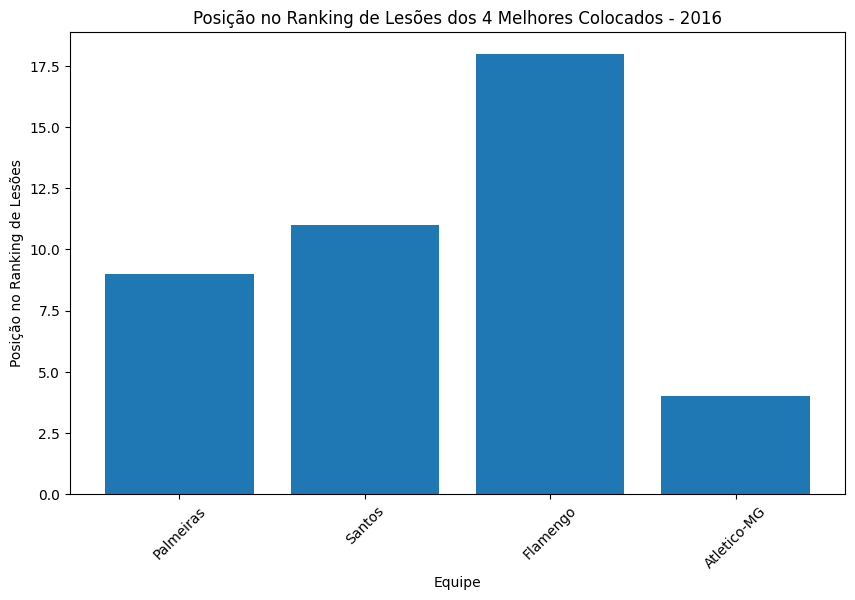

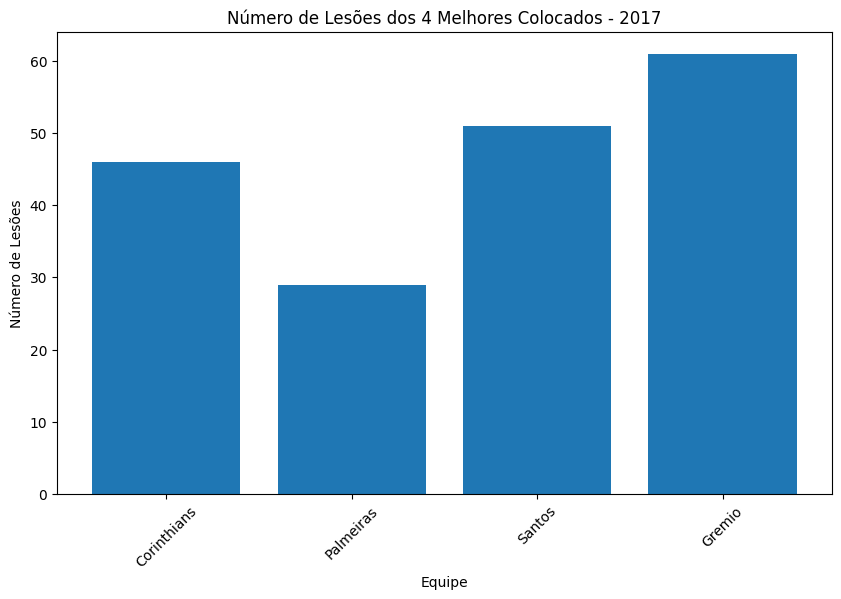

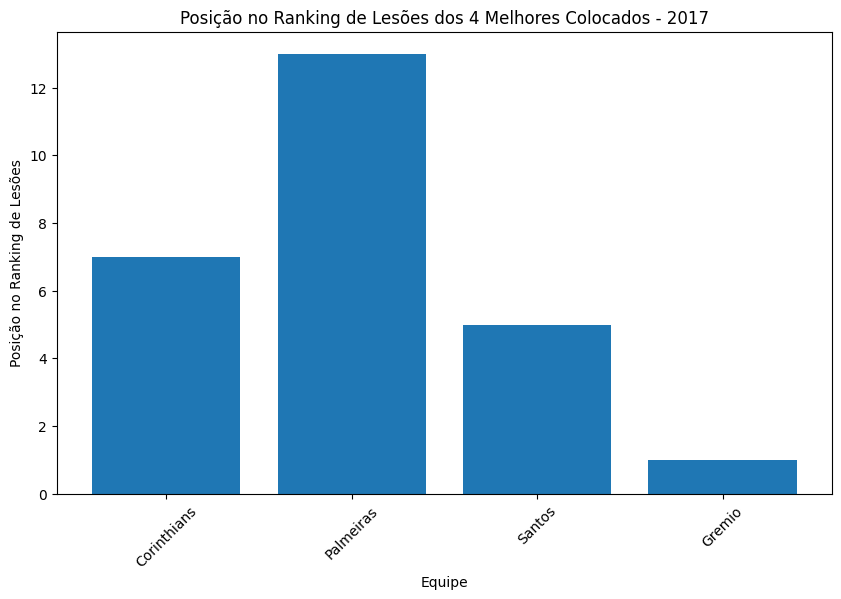

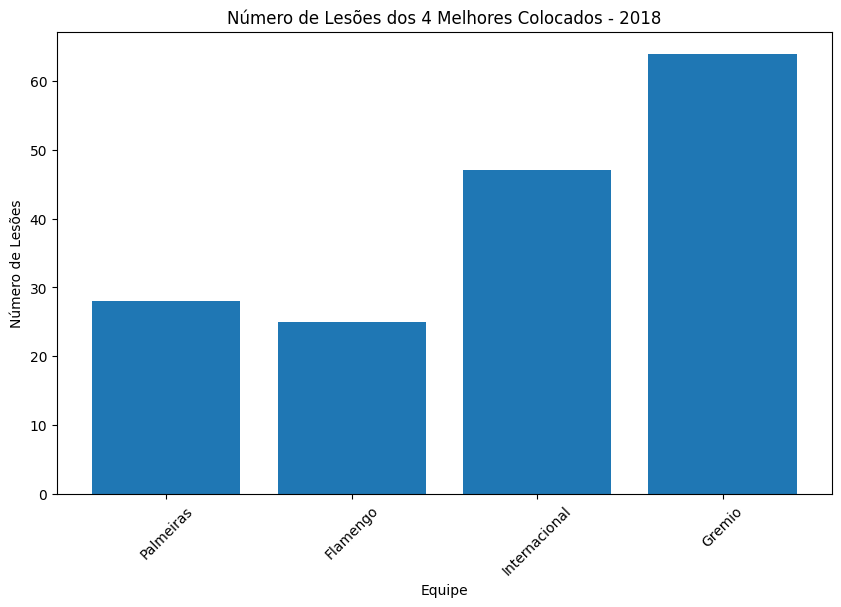

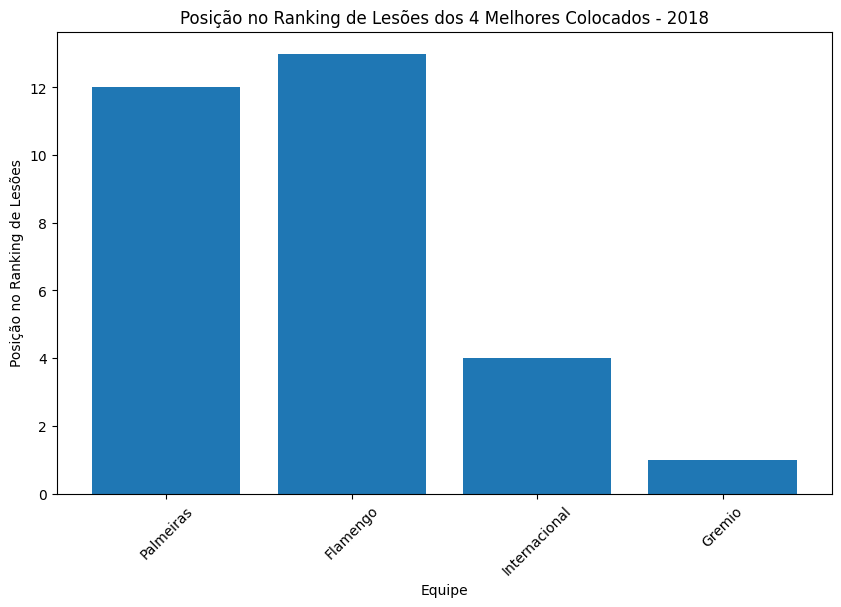

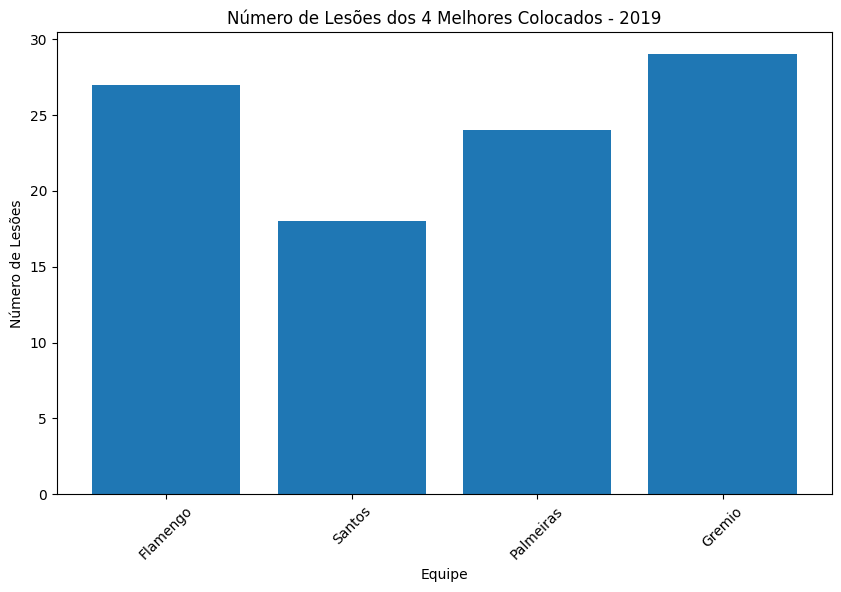

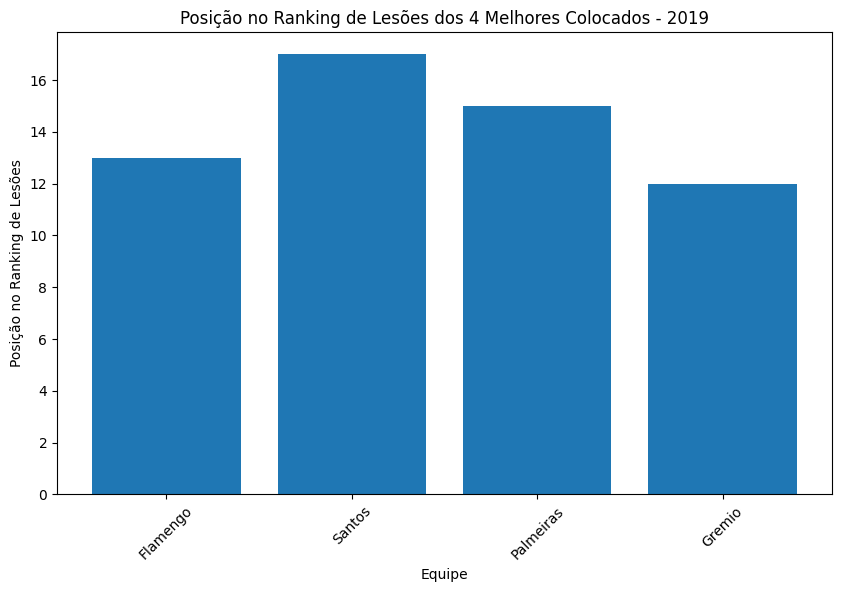

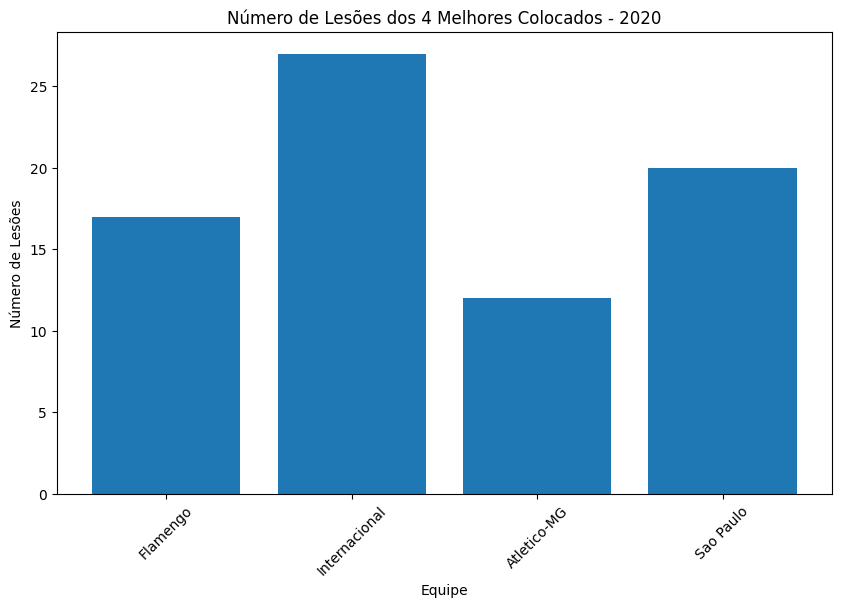

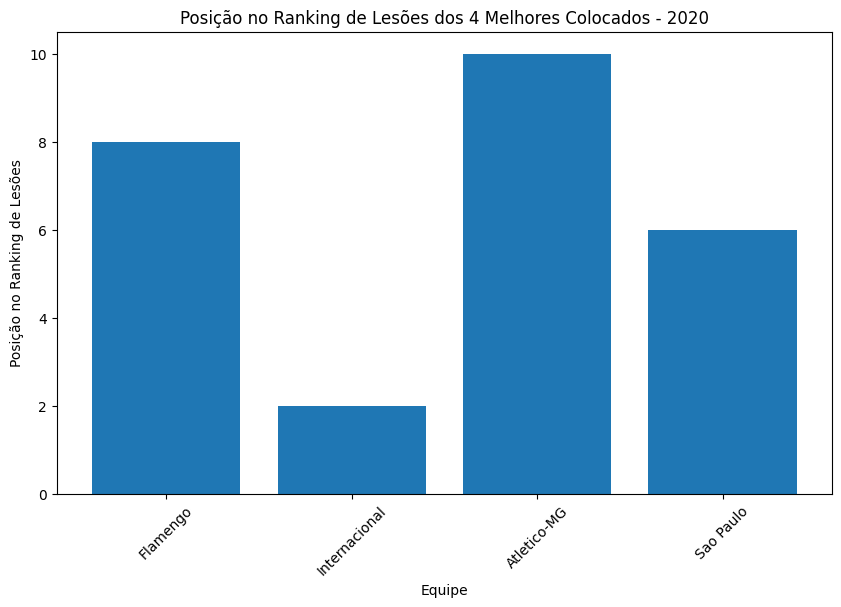

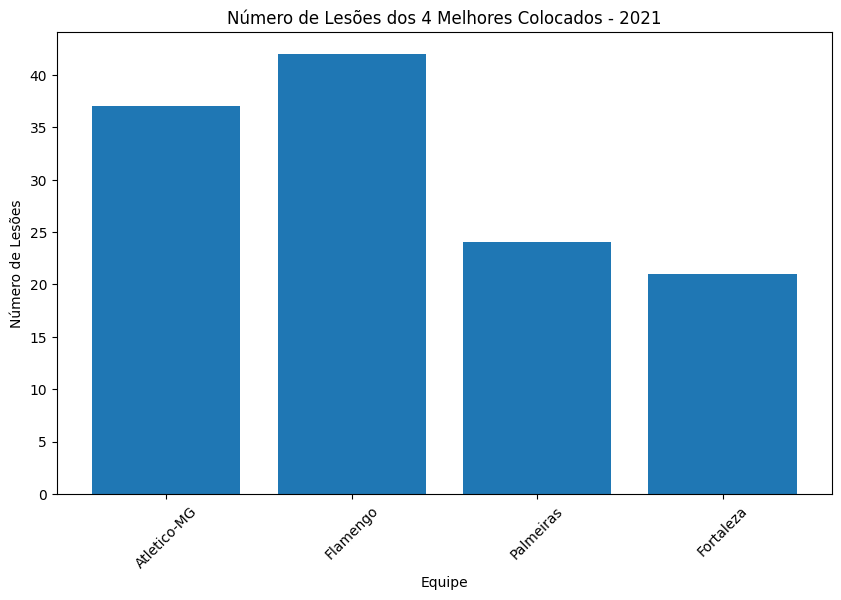

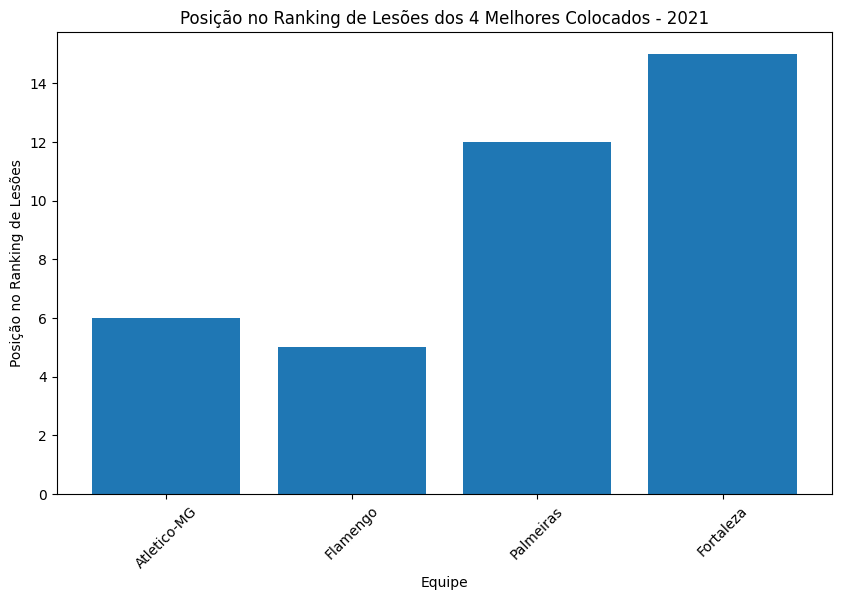

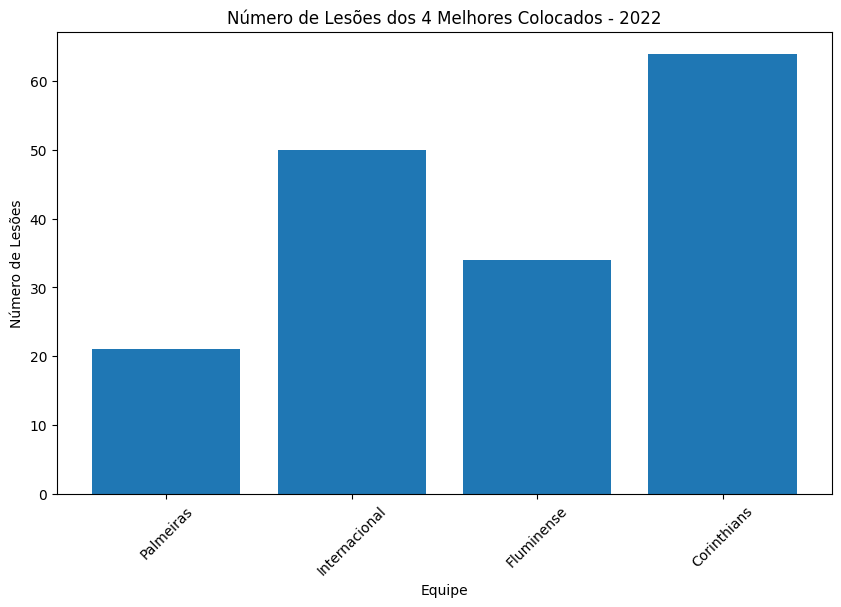

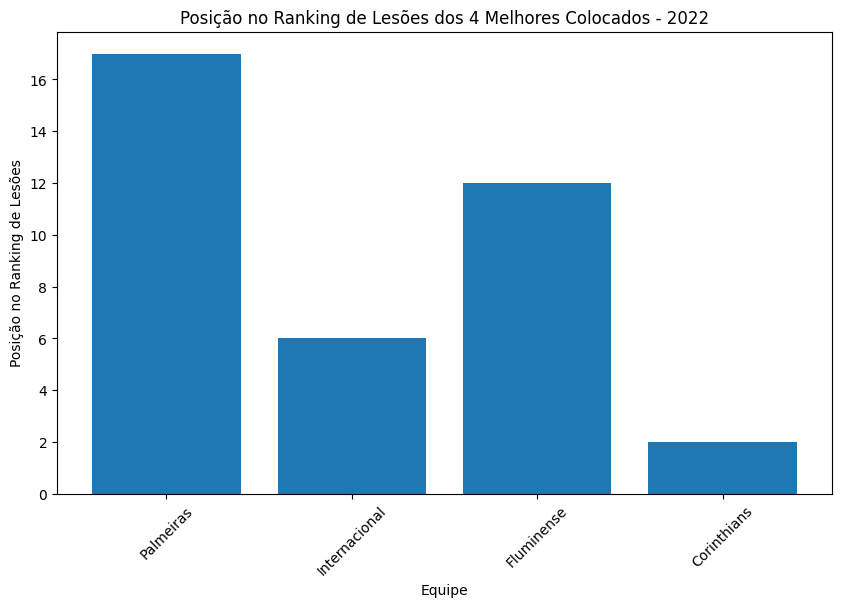

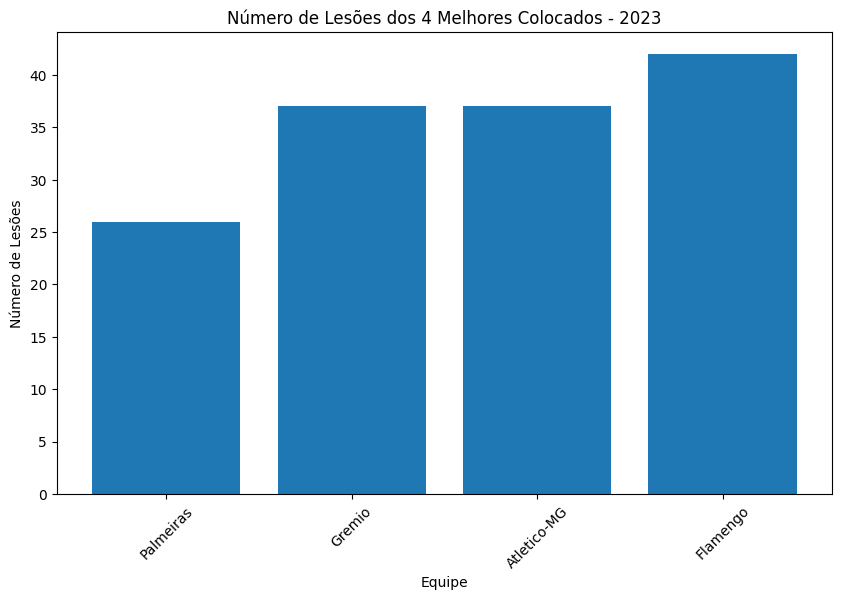

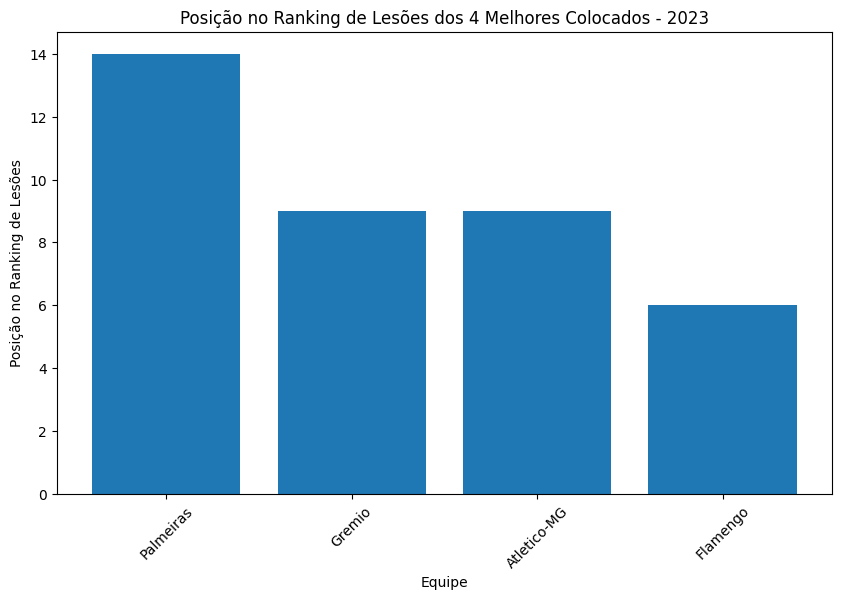

In [19]:

temporadas = data['season'].unique()

# Loop pelas temporadas
for temp in temporadas:
    dados_temp = data[data['season'] == temp]
    dados_temp = dados_temp.sort_values(by='place')
    top4 = dados_temp.head(4)
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(top4['team'], top4['injuries'])
    ax.set_title(f'Número de Lesões dos 4 Melhores Colocados - {temp}')
    ax.set_xlabel('Equipe')
    ax.set_ylabel('Número de Lesões')
    plt.xticks(rotation=45)
    plt.show()
    fig, ax = plt.subplots(figsize=(10, 6))
    ranking_lesoes = dados_temp['injuries'].rank(method='dense', ascending=False)
    top4_ranking = ranking_lesoes.loc[top4.index]
    ax.bar(top4['team'], top4_ranking)
    ax.set_title(f'Posição no Ranking de Lesões dos 4 Melhores Colocados - {temp}')
    ax.set_xlabel('Equipe')
    ax.set_ylabel('Posição no Ranking de Lesões')
    plt.xticks(rotation=45)
    plt.show()

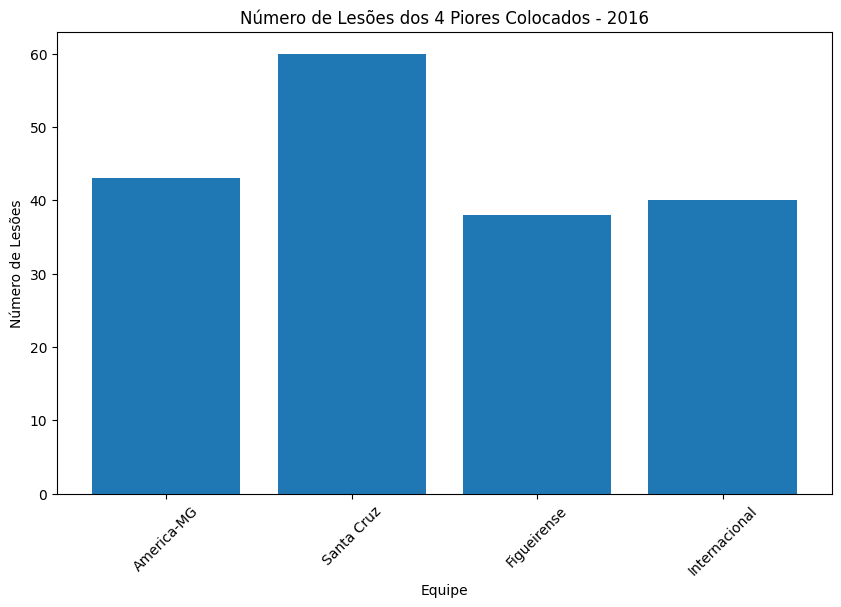

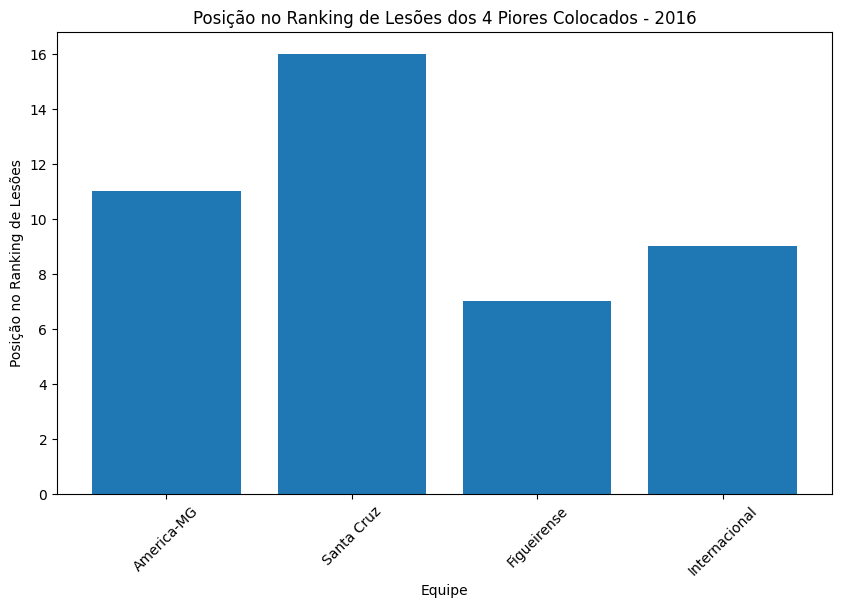

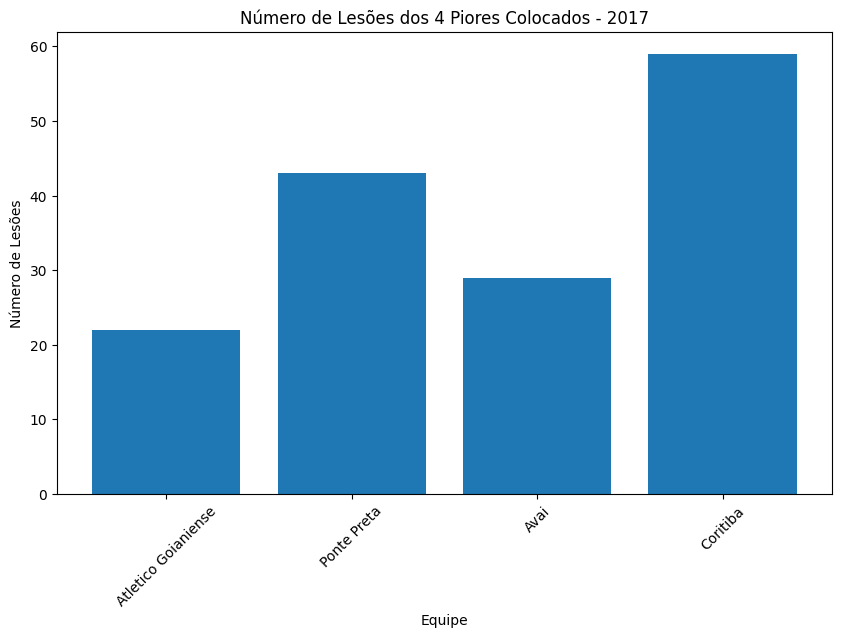

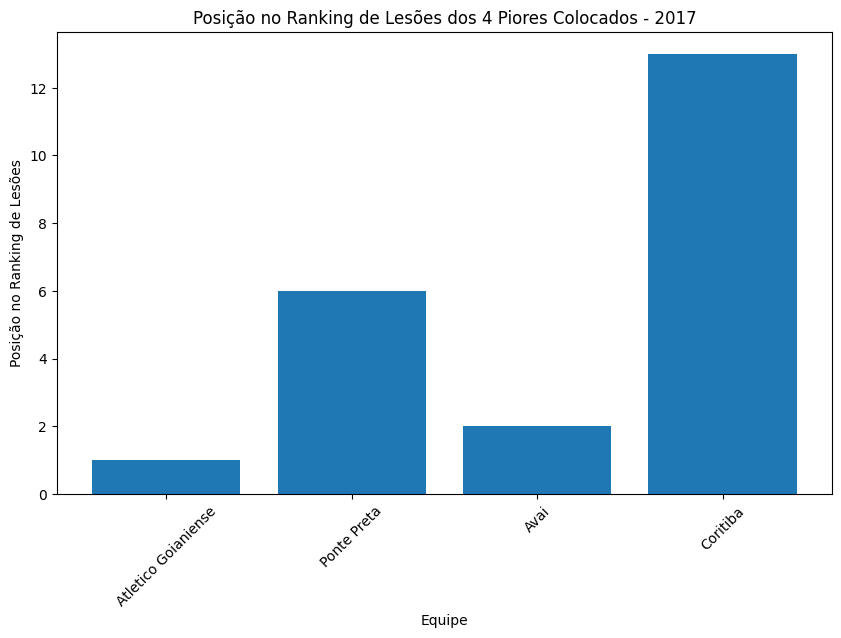

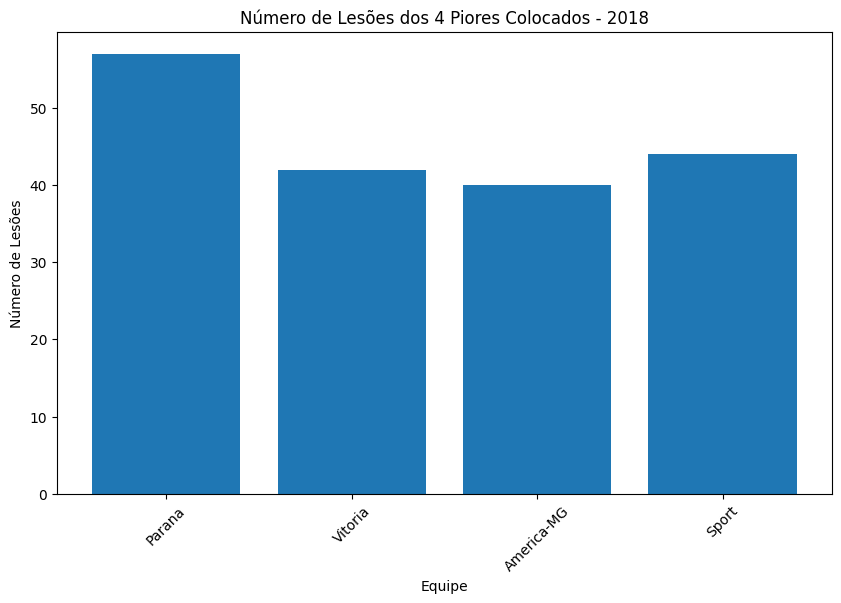

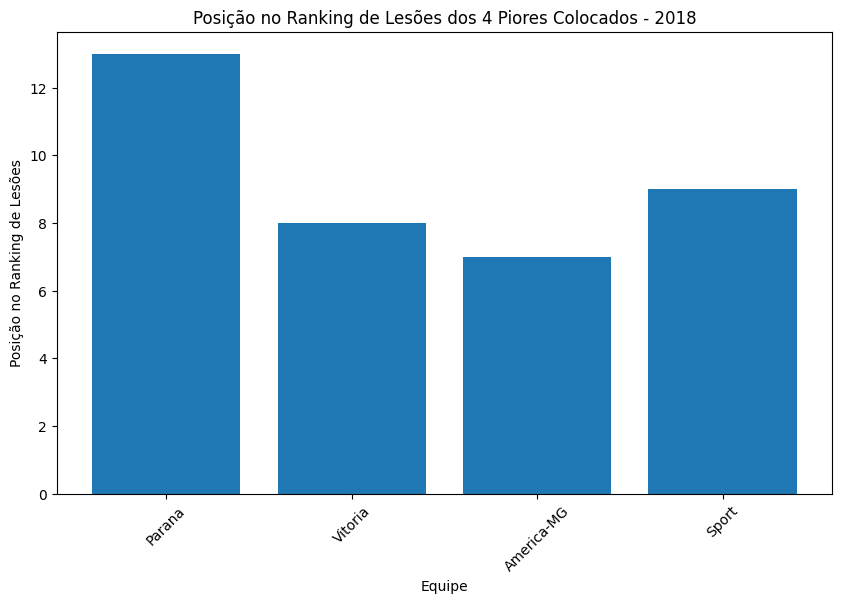

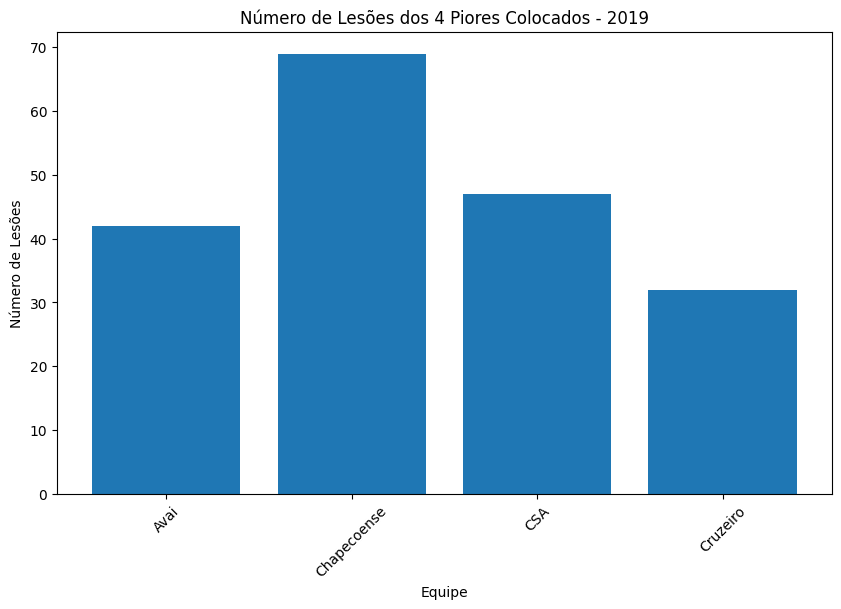

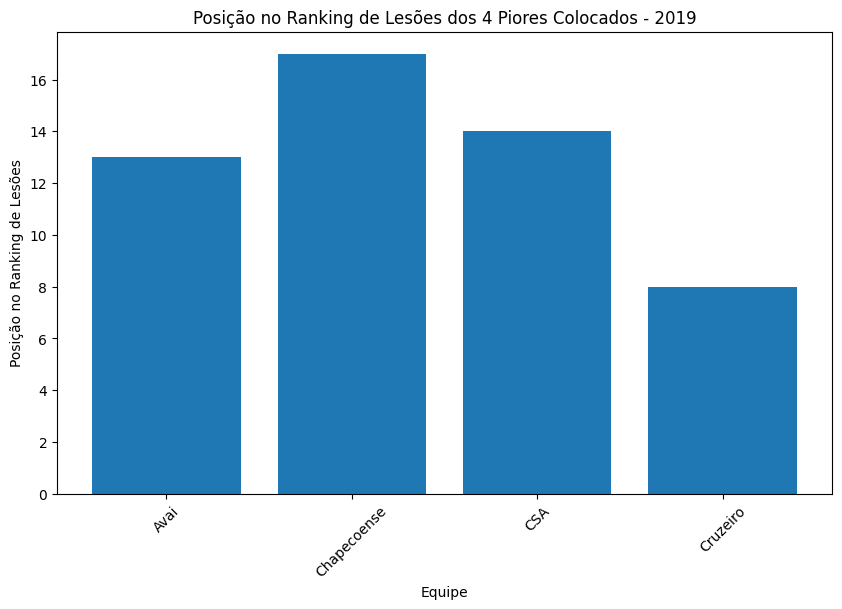

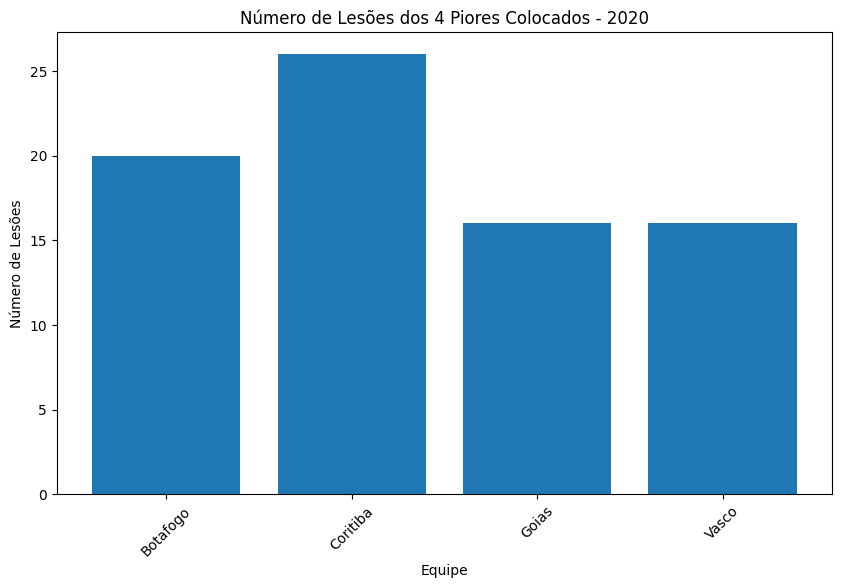

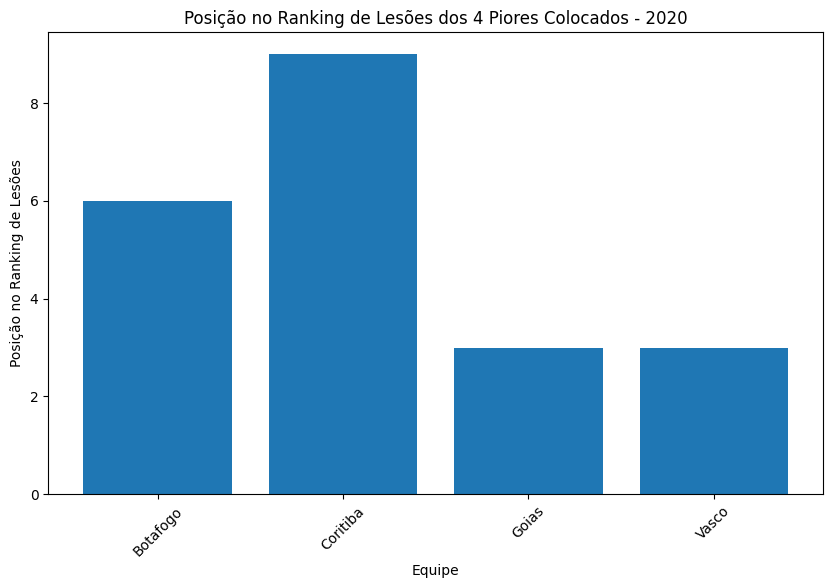

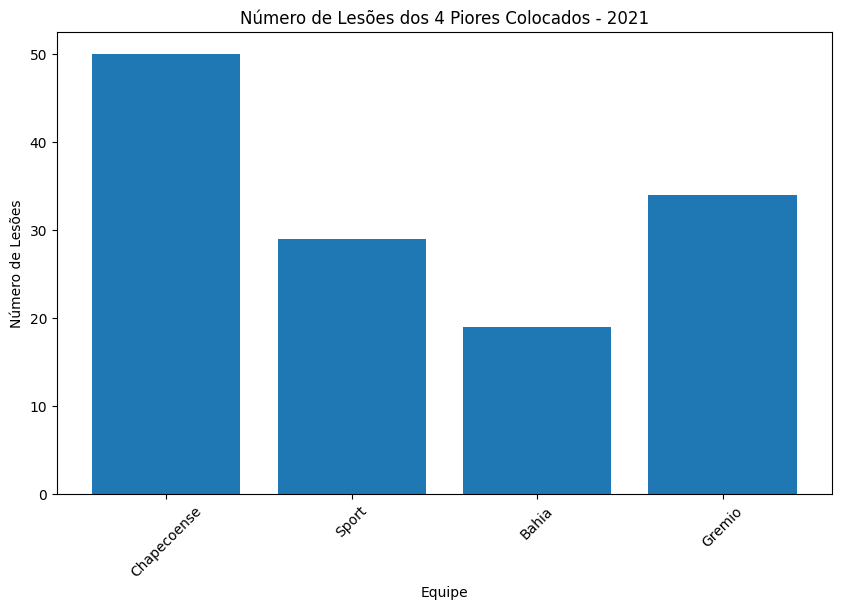

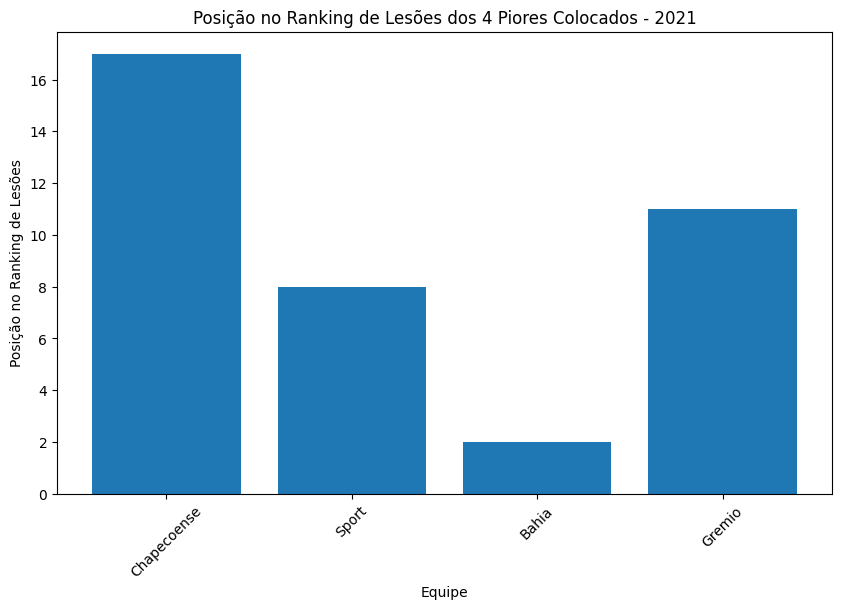

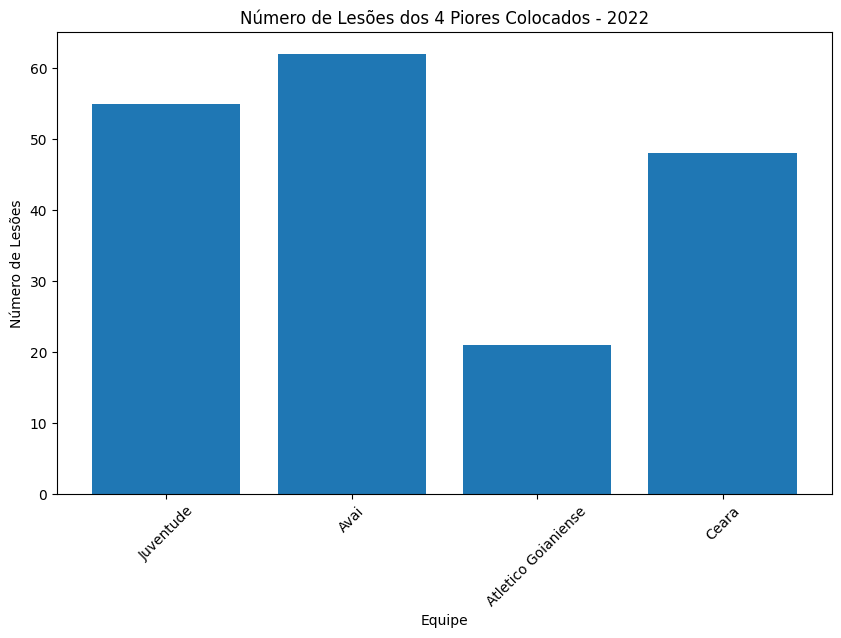

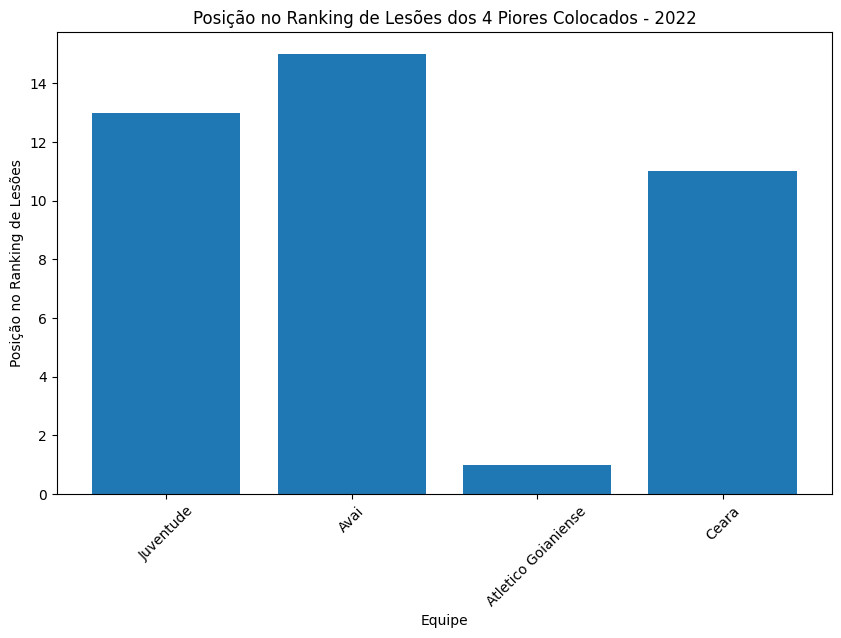

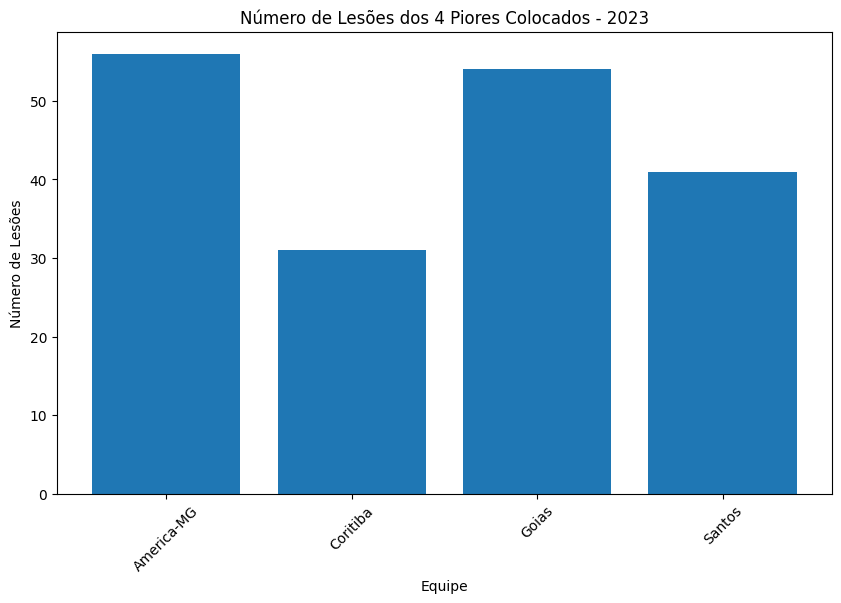

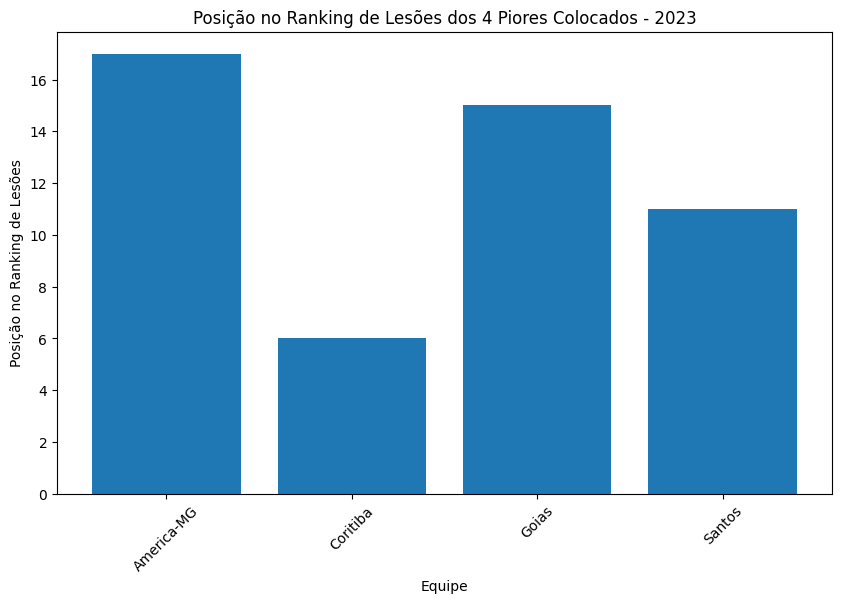

In [20]:
for temp in temporadas:
    # Filtragem dos dados para a temporada atual
    dados_temp = data[data['season'] == temp]
    
    # Ordenação dos dados pela coluna 'place' em ordem decrescente para obter os 4 piores colocados
    dados_temp = dados_temp.sort_values(by='place', ascending=False)
    bottom4 = dados_temp.head(4)
    
    # Criação do gráfico de barras para o número de lesões
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(bottom4['team'], bottom4['injuries'])
    ax.set_title(f'Número de Lesões dos 4 Piores Colocados - {temp}')
    ax.set_xlabel('Equipe')
    ax.set_ylabel('Número de Lesões')
    plt.xticks(rotation=45)
    plt.show()
    
    # Criação do gráfico de barras para a posição no ranking de lesões
    fig, ax = plt.subplots(figsize=(10, 6))
    ranking_lesoes = dados_temp['injuries'].rank(method='dense', ascending=True)
    bottom4_ranking = ranking_lesoes.loc[bottom4.index]
    ax.bar(bottom4['team'], bottom4_ranking)
    ax.set_title(f'Posição no Ranking de Lesões dos 4 Piores Colocados - {temp}')
    ax.set_xlabel('Equipe')
    ax.set_ylabel('Posição no Ranking de Lesões')
    plt.xticks(rotation=45)
    plt.show()

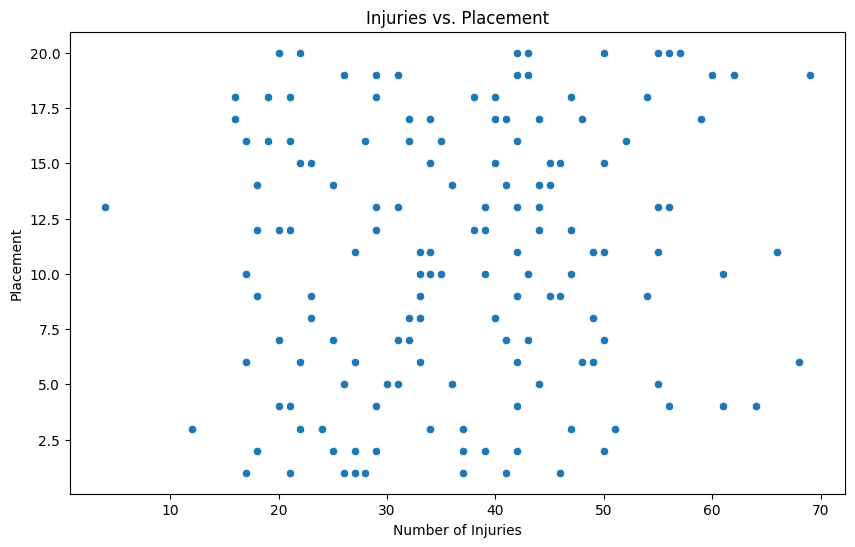

In [21]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='injuries', y='place')
plt.xlabel('Number of Injuries')
plt.ylabel('Placement')
plt.title('Injuries vs. Placement')
plt.show()

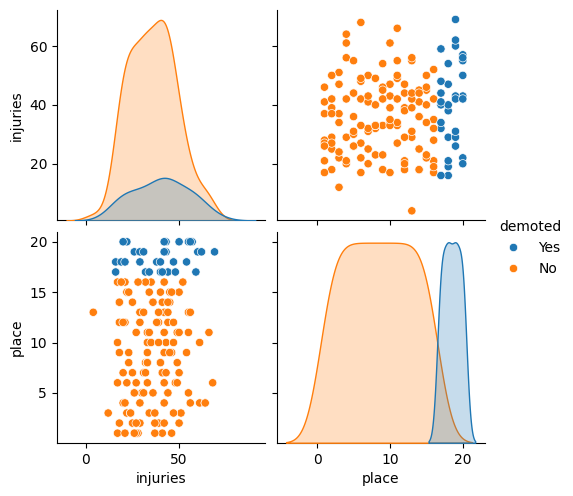

In [22]:
sns.pairplot(data[['injuries', 'place', 'demoted']], hue='demoted')
plt.show()

In [23]:
correlations = []
for season, group in data.groupby('season'):
    injuries = group['injuries']
    place = group['place']
    corr, p_value = pearsonr(injuries, place)
    correlations.append((season, corr))

for season, corr in correlations:
    print(f'Temporada {season}: Correlação = {corr:.2f}')

Temporada 2016: Correlação = -0.01
Temporada 2017: Correlação = -0.24
Temporada 2018: Correlação = 0.35
Temporada 2019: Correlação = 0.44
Temporada 2020: Correlação = -0.15
Temporada 2021: Correlação = -0.05
Temporada 2022: Correlação = 0.25
Temporada 2023: Correlação = 0.15
